In [5]:
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
import matplotlib

matplotlib.rc("text", usetex=True)
matplotlib.rc("font", **{"family": "serif", "serif": ["Computer Modern Roman, Times"]})


In [106]:
experiment_name = ["intrigued_kit_680", "melodic_doe_998"][0]


In [107]:
df = pd.read_csv(f"{experiment_name}.csv")
df["key"].unique()


array(['Correct prime', 'Source Correct Rank', 'Target Correct Rank',
       'Learning Rate', 'Prime Max', 'Prime Norm',
       'Source Normalized Correct Prediction',
       'Source Normalized Prediction', 'Source Prediction Entropy',
       'Target Normalized Correct Prediction',
       'Target Normalized Prediction'], dtype=object)

In [108]:
def get_df(df: pd.DataFrame, key):
    df_key = df[df["key"] == key].copy()
    df_key.rename(columns={"value": key}, inplace=True)  # type: ignore
    df_key.set_index("step", inplace=True)
    return df_key[[key]]


In [109]:
ncp_labels = [
    "Target Normalized Correct Prediction",
    "Source Normalized Correct Prediction",
    "Source Normalized Prediction"
]
prime_labels = [
    "Correct prime",
    "Prime Max"
]
labels = ncp_labels + prime_labels
df_ord = pd.concat(
    [get_df(df, label) for label in labels],
    axis=1,
)


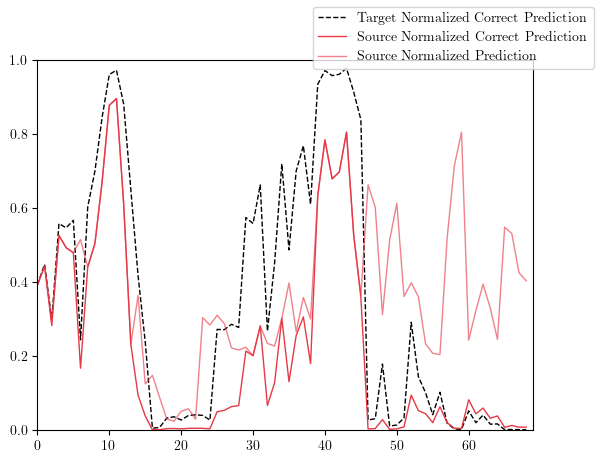

In [110]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(0, 69)
ax.set_ylim(0, 1)
ax.plot(
    df_ord[ncp_labels[0]],
    label=ncp_labels[0],
    color="black",
    linestyle="dashed",
    linewidth=1,
)
ax.plot(
    df_ord[ncp_labels[1]],
    label=ncp_labels[1],
    color="#e63946",
    linewidth=1,
)
ax.plot(
    df_ord[ncp_labels[2]],
    label=ncp_labels[2],
    color="#e63946a0",
    linewidth=1,
)
fig.legend()
plt.savefig(f"{experiment_name}_ncp.png", dpi=300)


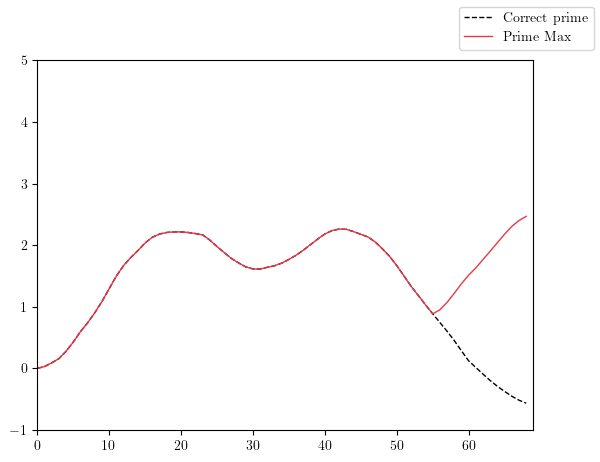

In [111]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(0, 69)
ax.set_ylim(-1, 5)
ax.plot(
    df_ord[prime_labels[0]],
    label=prime_labels[0],
    color="black",
    linestyle="dashed",
    linewidth=1,
)
ax.plot(
    df_ord[prime_labels[1]],
    label=prime_labels[1],
    color="#e63946",
    linewidth=1,
)
fig.legend()
plt.savefig(f"{experiment_name}_prime.png", dpi=300)
